In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [30]:
df=pd.read_csv("/Users/sanghvi/Desktop/Coding/ML/1_Restaurant_Ratings_Prediction/Dataset.csv")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [32]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [33]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

1.DATA PREPROCESSING

Dropping unnecessary columns

In [34]:
df=df.drop(columns=['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency','Switch to order menu', 'Rating color', 'Rating text'])

In [35]:
df.columns

Index(['Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

Applying IQR for removing the outliers for Average Cost for two

If a value is greater than upper_bound, replace it with upper_bound.
If a value is less than lower_bound, replace it with lower_bound.
Otherwise, keep the original value.

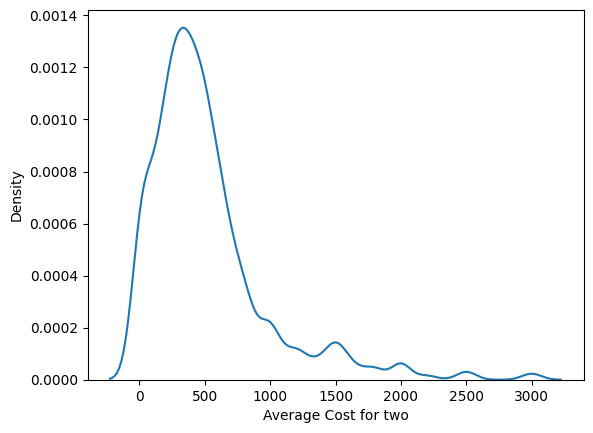

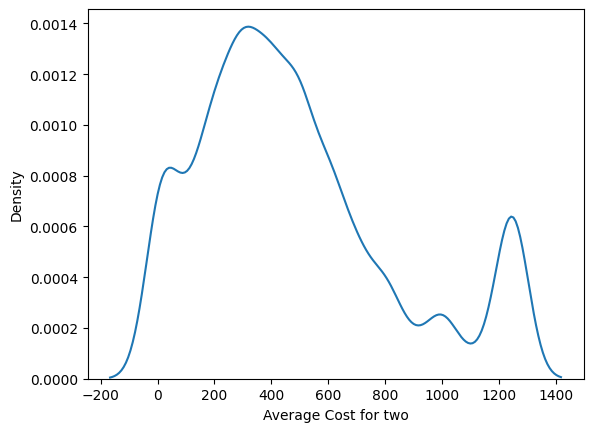

In [36]:
count_avg=df["Average Cost for two"].value_counts()

df["Average Cost for two"]=df['Average Cost for two'].apply(lambda x: 0 if count_avg[x] <=20 else x)
sns.kdeplot(df["Average Cost for two"])
plt.show()

Q1 = df["Average Cost for two"].quantile(0.25)
Q3 = df["Average Cost for two"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap extreme values
df["Average Cost for two"] = np.where(df["Average Cost for two"] > upper_bound, upper_bound,
np.where(df["Average Cost for two"] < lower_bound, lower_bound, df["Average Cost for two"]))
sns.kdeplot(df["Average Cost for two"])
plt.show()

Votes: Standardized Votes column

In [37]:
scale=StandardScaler()
df["Votes"]=scale.fit_transform(df[["Votes"]])

In [38]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Sample training data (Ensure it's representative of your dataset)
train_data = pd.DataFrame({'Votes': [100, 200, 300, 400, 500]})

# Train StandardScaler
scaler = StandardScaler()
scaler.fit(train_data[['Votes']])

# Save the trained scaler
joblib.dump(scaler, "/Users/sanghvi/Desktop/Coding/ML/1_Restaurant_Ratings_Prediction/scaler.pkl")

print("StandardScaler trained and saved as 'scaler.pkl'.")


StandardScaler trained and saved as 'scaler.pkl'.


Applying IQR for Votes

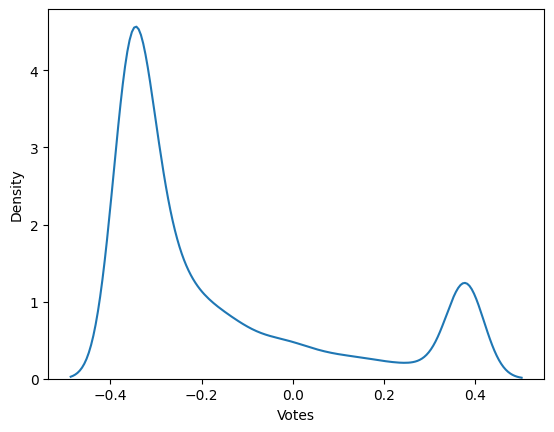

In [39]:
import numpy as np
Q1 = df["Votes"].quantile(0.25)
Q3 = df["Votes"].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Cap extreme values
df["Votes"] = np.where(df["Votes"] > upper_bound, upper_bound,np.where(df["Votes"] < lower_bound, lower_bound,
df["Votes"])) 
sns.kdeplot(df["Votes"]) 
plt.show()

Mapped Binary for the columns: Has Online Delevery, Has Table Bookig, Is Deleiivering Now

In [40]:
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df["Is delivering now"] = df['Is delivering now'].map({'Yes': 1, 'No': 0})

One Hot Encoding the columns City,Location,Average Cost for two

In [41]:
ohe = OneHotEncoder(sparse_output=False)

In [42]:
avg2_encoded = ohe.fit_transform(df[['Average Cost for two']])
avg2_df = pd.DataFrame(avg2_encoded, columns=ohe.get_feature_names_out(['Average Cost for two']))

In [43]:
df_combined = pd.concat([df, avg2_df], axis=1)
df_combined = df_combined.drop(columns=["Average Cost for two"])
df_combined

,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Average Cost for two_0.0,Average Cost for two_10.0,Average Cost for two_20.0,Average Cost for two_25.0,...,Average Cost for two_700.0,Average Cost for two_750.0,Average Cost for two_800.0,Average Cost for two_850.0,Average Cost for two_900.0,Average Cost for two_950.0,Average Cost for two_1000.0,Average Cost for two_1100.0,Average Cost for two_1200.0,Average Cost for two_1250.0
0,1,0,0,3,4.8,0.365202,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,3,4.5,0.379150,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,4,4.4,0.262911,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,4,4.9,0.379150,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0,4,4.8,0.167595,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,3,4.1,0.379150,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9547,0,0,0,3,4.2,0.379150,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9548,0,0,0,4,3.7,0.379150,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9549,0,0,0,4,4.0,0.379150,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder

# Sample training data (Ensure it's representative of your dataset)
train_data = pd.DataFrame({'Average Cost for two': [500, 1000, 1500, 2000]})

# Train OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(train_data[['Average Cost for two']])

# Save the trained encoder
joblib.dump(ohe, "/Users/sanghvi/Desktop/Coding/ML/1_Restaurant_Ratings_Prediction/ohe.pkl")

print("OneHotEncoder trained and saved as 'ohe.pkl'.")

OneHotEncoder trained and saved as 'ohe.pkl'.


In [45]:
df_combined.isnull().sum()
df=df_combined.dropna()

Building Train and Test Data

In [46]:
x=df.drop(columns=["Aggregate rating"])
y=df["Aggregate rating"]

In [47]:
x

,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,Average Cost for two_0.0,Average Cost for two_10.0,Average Cost for two_20.0,Average Cost for two_25.0,Average Cost for two_30.0,...,Average Cost for two_700.0,Average Cost for two_750.0,Average Cost for two_800.0,Average Cost for two_850.0,Average Cost for two_900.0,Average Cost for two_950.0,Average Cost for two_1000.0,Average Cost for two_1100.0,Average Cost for two_1200.0,Average Cost for two_1250.0
0,1,0,0,3,0.365202,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,3,0.379150,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,4,0.262911,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,4,0.379150,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0,4,0.167595,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,3,0.379150,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9547,0,0,0,3,0.379150,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9548,0,0,0,4,0.379150,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9549,0,0,0,4,0.379150,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

Building a model

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [50]:
RFR=RandomForestRegressor(n_estimators=200)
DTR=DecisionTreeRegressor()

In [51]:
RFR.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=200)

In [52]:
DTR.fit(xtrain,ytrain)

DecisionTreeRegressor()

Evaluating R2 Score

In [53]:
ypred_RFR_train=RFR.predict(xtrain)
ypred_RFR_test=RFR.predict(xtest)
print(r2_score(ytrain,ypred_RFR_train))
print(r2_score(ytest,ypred_RFR_test))

0.9798638878412002
0.939784731863128


In [54]:
ypred_DTR_train=DTR.predict(xtrain)
ypred_DTR_test=DTR.predict(xtest)
print(r2_score(ytrain,ypred_DTR_train))
print(r2_score(ytest,ypred_DTR_test))

0.9843931583670128
0.9160467539808053


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Assuming 'x' is your training data and 'ohe' is your OneHotEncoder
# Fit the OneHotEncoder with the training data
ohe = OneHotEncoder(handle_unknown='ignore')
x = pd.DataFrame({
    'Average Cost for two': [500, 1000, 1500, 2000],
    'Has Table booking': [1, 0, 1, 0],
    'Has Online delivery': [1, 1, 0, 0],
    'Is delivering now': [1, 0, 1, 0],
    'Price range': [1, 2, 3, 4],
    'Votes': [100, 200, 300, 400]
})
ohe.fit(x[['Average Cost for two']])

# Assuming 'RFR' is your trained RandomForestRegressor model
RFR = RandomForestRegressor()
RFR.fit(x, [4.5, 3.5, 4.0, 5.0])

# Function to take user inputs and predict the Aggregate rating
def predict_aggregate_rating():
    # Taking inputs from the user
    avg_cost = float(input("Enter Average Cost for two: "))
    has_table_booking = int(input("Has Table booking (1 for Yes, 0 for No): "))
    has_online_delivery = int(input("Has Online delivery (1 for Yes, 0 for No): "))
    is_delivering_now = int(input("Is delivering now (1 for Yes, 0 for No): "))
    price_range = int(input("Enter Price range (1 to 4): "))
    votes = float(input("Enter Votes: "))

    # Encoding the 'Average Cost for two' using the same OneHotEncoder
    avg_cost_encoded = ohe.transform([[avg_cost]])
    avg_cost_encoded_df = pd.DataFrame(avg_cost_encoded.toarray(), columns=ohe.get_feature_names_out(['Average Cost for two']))

    # Creating a dataframe for the input features
    input_data = pd.DataFrame({
        'Has Table booking': [has_table_booking],
        'Has Online delivery': [has_online_delivery],
        'Is delivering now': [is_delivering_now],
        'Price range': [price_range],
        'Votes': [votes]
    })

    # Concatenating the encoded 'Average Cost for two' with the input features
    input_data = pd.concat([input_data, avg_cost_encoded_df], axis=1)

    # Ensuring all columns are present in the input data
    for col in x.columns:
        if col not in input_data.columns:
            input_data[col] = 0

    # Predicting the Aggregate rating using the trained RandomForestRegressor model
    prediction = RFR.predict(input_data)
    print(f"Predicted Aggregate rating: {prediction[0]}")

# Call the function to take inputs and predict the output
predict_aggregate_rating()

In [ ]:
import joblib
joblib.dump(RFR,'/Users/sanghvi/Desktop/Coding/ML/1_Restaurant_Ratings_Prediction/model_2.pkl')

['/Users/sanghvi/Desktop/Coding/ML/Restaurant_Ratings_Prediction/model_2.pkl']